In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Observe Data Frame

In [206]:
df = pd.read_csv("ChemicalDescriptor.csv")
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 552 entries, experimental_proprty to n6Ring
dtypes: float64(444), int64(105), object(3)
memory usage: 8.4+ MB
None


,experimental_proprty,MS_enc,nHetero,nX,C2SP3,MPC5,ATS0i,NaasN,SsCH3,nCl,...,AATS0Z,ATSC0are,ATSC2pe,SsCl,ATS6v,AATSC1dv,nFARing,AATS2v,Xp-7dv,n6Ring
0,3.54,PPENPINEAPLE42,5,1,0,83,7305.483137,1,2.105782,1,...,26.444444,2.995920,-0.508149,5.976320,16177.071020,1.102539,0,223.767000,0.903808,3
1,-1.18,PPENPINEAPLE42,11,0,3,114,9532.633527,0,4.605907,0,...,31.796610,9.996180,2.554415,0.000000,29893.511410,0.854039,1,225.916087,1.887922,3
2,3.69,PPENPINEAPLE42,5,1,2,69,5845.023999,0,1.422763,1,...,35.513514,3.773573,-0.113725,6.285975,17264.331087,0.793417,1,241.492298,1.098203,2
3,3.37,HTXPTDWTTWOBJR,9,1,3,105,7388.625069,0,0.000000,1,...,35.869565,6.699887,-0.114253,5.958016,20506.327989,0.421656,1,254.318903,1.164550,2
4,3.10,PPENPINEAPLE42,7,0,2,68,9082.560968,1,9.734779,0,...,21.018182,5.862455,1.664804,0.000000,22748.101433,1.602810,0,207.685522,0.492884,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2.06,PPENPINEAPLE42,12,2,5,111,11428.201740,0,0.000000,0,...,24.970588,12.971651,-0.366319,0.000000,24723.464405,1.033473,0,222.862881,0.893994,3
1996,3.03,PPENPINEAPLE42,6,2,2,66,7372.541891,0,0.000000,1,...,28.888889,7.099480,-0.890364,5.860789,14440.287915,0.773582,0,225.391710,0.728822,3
1997,3.80,VMZXVMIGMRZLPU,9,0,0,74,9326.669184,0,7.191590,0,...,22.285714,8.026598,1.374708,0.000000,19394.335824,1.780040,0,197.446318,0.562785,3
1998,3.22,HTXPTDWTTWOBJR,9,1,2,103,6732.866534,0,0.000000,1,...,38.000000,5.735850,1.192770,5.946582,17791.951828,0.622862,1,265.517011,1.081912,2


### observe object column

In [207]:
for col in range(len(df.columns)): #552 coluns
    if df.iloc[:,col].dtype in ['object']: # Check if column data type is object
        print(df.columns[col], "is an object column, has an index ", col, ".")
print(df.iloc[:,1])
print(df.iloc[:,93])
print(df.iloc[:,197])

MS_enc is an object column, has an index  1 .
MIF is an object column, has an index  93 .
SMIF is an object column, has an index  197 .
0       PPENPINEAPLE42
1       PPENPINEAPLE42
2       PPENPINEAPLE42
3       HTXPTDWTTWOBJR
4       PPENPINEAPLE42
             ...      
1995    PPENPINEAPLE42
1996    PPENPINEAPLE42
1997    VMZXVMIGMRZLPU
1998    HTXPTDWTTWOBJR
1999    PPENPINEAPLE42
Name: MS_enc, Length: 2000, dtype: object
0       Computation failed
1                       59
2                       37
3                       46
4                       55
               ...        
1995                    68
1996                    45
1997                    56
1998                    42
1999                    50
Name: MIF, Length: 2000, dtype: object
0            bigger
1       the_biggest
2               big
3            bigger
4            bigger
           ...     
1995    the_biggest
1996         bigger
1997         bigger
1998         bigger
1999         bigger
Name: SMIF, L

### There are 552 columns, and 2000 rows. There are 444 columns in type of float64, 105 columns in type of int64, and 3 columns in type of object. I also observed the columns 'MS_enc', 'MIF', and 'SMIF' since they has object type.

In [208]:
print(df['MS_enc'].unique())
print(df['MIF'].unique())
print(df['SMIF'].unique())

['PPENPINEAPLE42' 'HTXPTDWTTWOBJR' 'GOMNOOKGLZYEJT' 'RCRMUKSWQWDMNL'
 'BOTNYLSAWDQNEX' 'ZUOUZKKEUPVFJK' 'GALNGAIOIHBIMC' 'IGCQXMQOKRXHHN'
 'PBKBKIZZTQGPNF' 'HMOUISRYHLEUNP' 'NRTUTGBOQZQBMB' 'BAXOFTOLAUCFNW'
 'NEEMPYCQFCVGIU' 'WKEHRSGEQPYYPS' 'RFJPGRQJVLXFBM' 'RTVJPISFXFDDFU'
 'FXSUMCOIAGFLPN' 'UYYKSGIDWWMCHC' 'NXYOGONNLGHJLI' 'DSAYTZOSLVGXMN'
 'JBKDDNGUOPDBIN' 'UHOVQNZJYSORNB' 'ZVSKZLHKADLHSD' 'VHEGBLPHXSCODD'
 'UGYJQWOEXDFOBE' 'DBDVAKGHPZJLTH' 'ZLUIDXRFWSPPCC' 'WFGFEOLNELJISV'
 'JHAGKBVBZDYISA' 'IOJUPLGTWVMSFF' 'VFVXVRPTRGHSHB' 'JYTRDJFJTLMAHG'
 'YYVYAPXYZVYDHN' 'GCRYKXLRCQDDAD' 'FGDGJJNJEUYMFK' 'NBWZTGIODNJYRQ'
 'FBNDAUIIDREEIK' 'SMWDFEZZVXVKRB' 'FSEXLNMNADBYJU' 'VMZXVMIGMRZLPU'
 'ZKZKYIVHVORTNZ' 'KCZQVDUNRPTDJR' 'MTSNDBYBIZSILH' 'FIVCRRVYLAXYFC'
 'YBHCYGZJSRSNRK' 'XAUGWFWQVYXATQ' 'XTUIDRJNCMLRAD' 'PTRTXJMGYGBMDT'
 'GKFFFOLFBJUEFN' 'SWUJGAXOMZUIRP' 'UFWIBTONFRDIAS']
['Computation failed' '59' '37' '46' '55' '44' '66' '39' '21' '51' '43'
 '19' '60' '27' '56' '57' '50' '64' '48' '58' '

### Erroneous Data:

### observe distribution 

Computation failed    100
45                     58
52                     57
54                     55
58                     55
                     ... 
128                     1
203                     1
86                      1
97                      1
85                      1
Name: MIF, Length: 85, dtype: int64


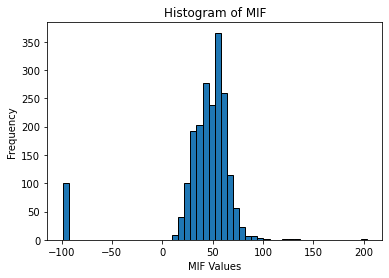

In [209]:
MIF_counts = df['MIF'].value_counts()
print(MIF_counts)
df1= df.copy()
#replace erroneous data with -99
df1['MIF'] = df1['MIF'].replace('Computation failed', '-99')
df1['MIF'] = df1['MIF'].astype(int)

df1['MIF'].hist(bins=50, edgecolor='black') 
plt.title('Histogram of MIF')
plt.xlabel('MIF Values')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

### Convert object type to Int:

In [210]:
SMIF_mapping = {
    'big': 1,
    'bigger': 2,
    'the_biggest': 3
}
df1['SMIF'] = df1['SMIF'].map(SMIF_mapping)
print(df1['SMIF'])

0       2
1       3
2       1
3       2
4       2
       ..
1995    3
1996    2
1997    2
1998    2
1999    2
Name: SMIF, Length: 2000, dtype: int64


## Missing Values (NaNs):

### replace missing values with median after observing distribution

In [211]:
print('There are %i nan in the dataframe' % df1.isna().sum().sum())
print(df1.loc[:, df1.isnull().any()])
print(df1.loc[:, df1.isnull().all()])

There are 100 nan in the dataframe
             MW2
0     340.145474
1     494.118143
2     321.059027
3     419.070655
4     381.216475
...          ...
1995  537.229994
1996  362.119734
1997  401.206304
1998  402.055339
1999  370.180504

[2000 rows x 1 columns]
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[2000 rows x 0 columns]


In [212]:
df1['MW2'].describe()

count    1900.000000
mean      382.775606
std       109.291002
min       113.084064
25%       305.143716
50%       387.649637
75%       457.153473
max      1421.748941
Name: MW2, dtype: float64

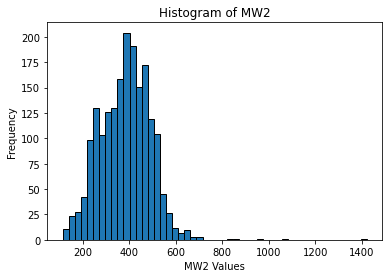

In [213]:
#I am plotting the histogram of the column with missing value to see how should I deal with them.
df1['MW2'].hist(bins=50, edgecolor='black') 
plt.title('Histogram of MW2')
plt.xlabel('MW2 Values')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

### Replace missing value with median:

In [214]:
MW2Median = df1['MW2'].median()
df1['MW2'].fillna(MW2Median, inplace=True)

## Outliers:

### Remove columns with only one unique value b/c they are non-informative

In [215]:
int_columns = df1.select_dtypes(include=['int','object','float']).columns
unique_values = df1[int_columns].nunique()
categorical_columns = unique_values[unique_values < 2].index.tolist()
print(categorical_columns)
df1.drop(['MIF2','MIF3'], axis=1, inplace=True)
df1
#print(len(categorical_columns))

['MIF2', 'MIF3']


,experimental_proprty,MS_enc,nHetero,nX,C2SP3,MPC5,ATS0i,NaasN,SsCH3,nCl,...,AATS0Z,ATSC0are,ATSC2pe,SsCl,ATS6v,AATSC1dv,nFARing,AATS2v,Xp-7dv,n6Ring
0,3.54,PPENPINEAPLE42,5,1,0,83,7305.483137,1,2.105782,1,...,26.444444,2.995920,-0.508149,5.976320,16177.071020,1.102539,0,223.767000,0.903808,3
1,-1.18,PPENPINEAPLE42,11,0,3,114,9532.633527,0,4.605907,0,...,31.796610,9.996180,2.554415,0.000000,29893.511410,0.854039,1,225.916087,1.887922,3
2,3.69,PPENPINEAPLE42,5,1,2,69,5845.023999,0,1.422763,1,...,35.513514,3.773573,-0.113725,6.285975,17264.331087,0.793417,1,241.492298,1.098203,2
3,3.37,HTXPTDWTTWOBJR,9,1,3,105,7388.625069,0,0.000000,1,...,35.869565,6.699887,-0.114253,5.958016,20506.327989,0.421656,1,254.318903,1.164550,2
4,3.10,PPENPINEAPLE42,7,0,2,68,9082.560968,1,9.734779,0,...,21.018182,5.862455,1.664804,0.000000,22748.101433,1.602810,0,207.685522,0.492884,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2.06,PPENPINEAPLE42,12,2,5,111,11428.201740,0,0.000000,0,...,24.970588,12.971651,-0.366319,0.000000,24723.464405,1.033473,0,222.862881,0.893994,3
1996,3.03,PPENPINEAPLE42,6,2,2,66,7372.541891,0,0.000000,1,...,28.888889,7.099480,-0.890364,5.860789,14440.287915,0.773582,0,225.391710,0.728822,3
1997,3.80,VMZXVMIGMRZLPU,9,0,0,74,9326.669184,0,7.191590,0,...,22.285714,8.026598,1.374708,0.000000,19394.335824,1.780040,0,197.446318,0.562785,3
1998,3.22,HTXPTDWTTWOBJR,9,1,2,103,6732.866534,0,0.000000,1,...,38.000000,5.735850,1.192770,5.946582,17791.951828,0.622862,1,265.517011,1.081912,2


### Find catogorical features:

In [216]:
int_columns1 = df1.select_dtypes(include=['int','object','float']).columns
unique_values1 = df1[int_columns1].nunique()
categorical_columns1 = unique_values1[unique_values1 < 50].index.tolist()
#print(categorical_columns1)
print(len(categorical_columns1))

96


### Replace erroneous value with column median:

In [217]:
#I need to make a copy of df1 for computing the outliers becasue I will need to modify the the data frame so that it is suitible to do the zscore computation as I also want to keep the original copy of the data frame. 
#If I need to do further modification on the dataset about the outliers, I will do it on the copy of df1.
df2 = df1.copy()
MIFMedian = df2[df2['MIF'] != -99]['MIF'].median()
df2['MIF'] = df2['MIF'].replace(-99, MIFMedian)

### Distinguish categorical columns by filling 99:

In [218]:
for col in df2:
    for cat in categorical_columns1:
        if col == cat:
            df2[col] = 99
#print(df2['experimental_proprty'])
#print(df2['SMR_VSA2'])
print(len(df2.columns))

550


### Computing z_score for columns with continuous variable:

In [219]:
from scipy.stats import zscore

threshold = 3
outlierArray = np.zeros((2000, 552))
outlierCount = []
for col in range(len(df2.columns)): #550 colunms
    z_scores = []
    count = 0
    if (df2.iloc[:,col].dtype in ['int64', 'float64']) and (df2.columns[col] not in categorical_columns1): 
        # Check if column data type is integer or float, and is not one of the categorical columns.
        z_scores.extend(zscore(df2.iloc[:,col]))
        for row in range(len(z_scores)): #2000 rows
            if abs(z_scores[row]) > threshold:
                outlierArray[row,col] = 1
                count = count +1
                #if col == 93:
                    #print(count)
        outlierCount.append(count)
    else:
        outlierArray[:,col] = 0
        outlierCount.append(count)
        #print(col)
        #print(outlierCount[col])

print(sum(outlierCount))
print(len(outlierArray))
print(outlierArray.shape[1])

### I created a 2d Array to store the existance of the outliers (in case I need it for future usage). If a value of a column is an outlier, I assigned 1 to its corresponding location. Otherwise, there will be a 0.
### I also created a 1d Array to store the total outliers in each column. 

8025
2000
552


### Remove Outlier Test:

In [220]:
rowToRemove = np.any(outlierArray == 1, axis=1)
row_indices = np.where(rowToRemove)[0]
#print(row_indices)
print("There are ",len(row_indices),"rows with at least one outlier.")
count = 0
df2.drop(row_indices, inplace=True)
print("There are ", len(df2),"row left after taking away all the rows with outliers.")

There are  1243 rows with at least one outlier.
There are  757 row left after taking away all the rows with outliers.


### Since taking away all the rows with at least one outlier will result in truncating a big portion of the original dataset, I think I should not throw away all the outliers.

## Highly Correlated Variables:

In [221]:
print((df1.corr()).shape)
# It drops the columns with object type.

(549, 549)


### Find highly correlated pairs:

In [222]:
correlation = df1.corr()
threshold = 0.8

highly_correlated_pairs = []

for i in range(len(correlation.columns)):
    for j in range(i+1, len(correlation.columns)): #avoid duplicate and self comparison
        if abs(correlation.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((correlation.columns[i], correlation.columns[j]))

print(len(highly_correlated_pairs))
#print(highly_correlated_pairs)


13134


In [223]:
found = False
for pair in highly_correlated_pairs:
    if 'MIF' in pair:
        found = True
        break
if found:
    print("'MIF' is in one of the pairs.")
else:
    print("'MIF' is not in any of the pairs.")
    
df1.drop(columns=['MIF'], inplace=True)

'MIF' is not in any of the pairs.


### Since MIF is the only column with erroreous data, and I found that it is not highly correlated with any other features, I decided to remove it to refine my df1

### Visuallize correlated feature interconnection:

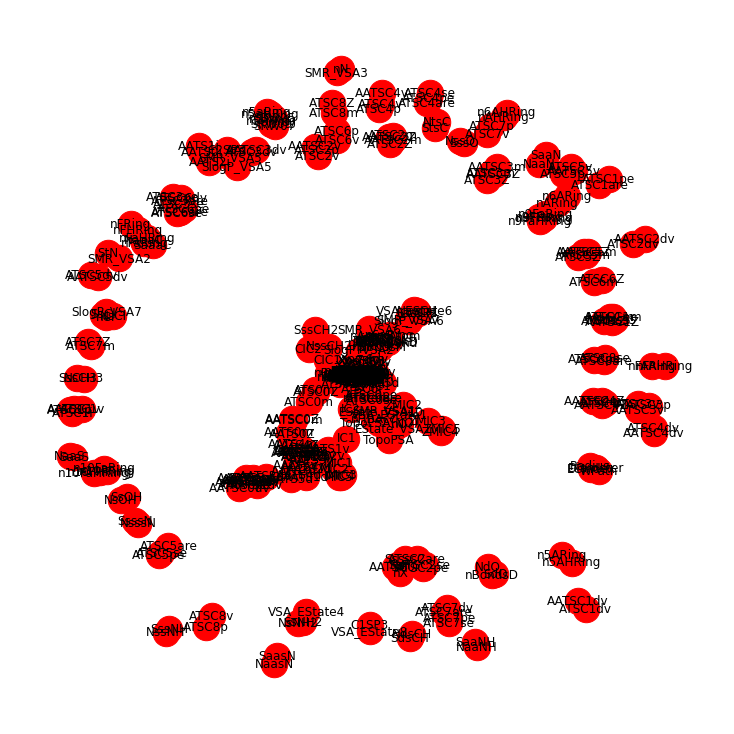

In [224]:
import networkx as nx
G = nx.Graph()
for pair in highly_correlated_pairs:
    G.add_edge(pair[0], pair[1])

plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_color='red', node_size=700, edge_color='gray',font_size=12)
plt.show()

### Although the column names in the figure are crumble together, but we can still observed that there are pairs of highly correlated pairs are clustering together in the center of the network graph, which means that thery are strong correlations among those pairs.

In [225]:
G.add_edges_from(highly_correlated_pairs)
correlatedSets = list(nx.connected_components(G))
#print(correlatedSets)
print(len(correlatedSets))

58


### the correlatedSets list stores 58 sets of interconnected variables. Each set represents a group of columns where each column is highly correlated with at least one other column in the set.

## Target variable vs. other features:

In [226]:
targetCorr = df1.corr().iloc[0]
targetCorr = targetCorr.drop(df.columns[0])
print(targetCorr)
Tthreshold = 0.7
targetHCorr= targetCorr[targetCorr.abs() > Tthreshold]
print("\nColumns Highly Correlated with Target:")
print(targetHCorr)

nHetero    -0.001041
nX          0.104810
C2SP3      -0.013005
MPC5        0.227933
ATS0i       0.147328
              ...   
AATSC1dv    0.168562
nFARing    -0.027669
AATS2v      0.092026
Xp-7dv      0.121074
n6Ring      0.219923
Name: experimental_proprty, Length: 547, dtype: float64

Columns Highly Correlated with Target:
Series([], Name: experimental_proprty, dtype: float64)


### I don't see any features in the df that are highly correlated with the Target Variable. Thus, I would try to observe its relationship with the categorical columns.

### I want to check how the categorical columns has association with the target variable. Thus, I will use ANOVA test to check if there are any statistically significant differences in the mean of the continuous target variable between the categories of a nominal variable.

In [227]:
significant_columns = []

alpha = 0.000000000000001  # significance level, can adjust if needed

for col in categorical_columns1:
    groups = [df1['experimental_proprty'][df1[col] == category] for category in df1[col].unique()]
    _, p_val = stats.f_oneway(*groups)
    #The smaller the p value is, the bigger different the means of the target variable is across the categorical column.
    #Meaning that there there are association between the target variable and the categorical column
    if p_val < alpha: 
        significant_columns.append(col)

print("Categorical columns that might have a significant relationship with the target variable:")
print(significant_columns)
print(len(significant_columns))

Categorical columns that might have a significant relationship with the target variable:
['nHBDon', 'nAcid', 'C2SP2', 'nBondsA', 'nBondsKD', 'n6aRing', 'Diameter', 'nBase', 'nC', 'nRing', 'nAromBond', 'naRing', 'nAromAtom', 'NaasC', 'Radius', 'NaaCH', 'NsOH', 'nBondsM', 'n6Ring']
19


### Since I want to find the categorical columns that are HIGHLY correlated with the target variable, I want a very small p-value, so I set alpha to a very small number. The following is a visualization of the target variable vs. each of the categorical column that has high correlation with it. 

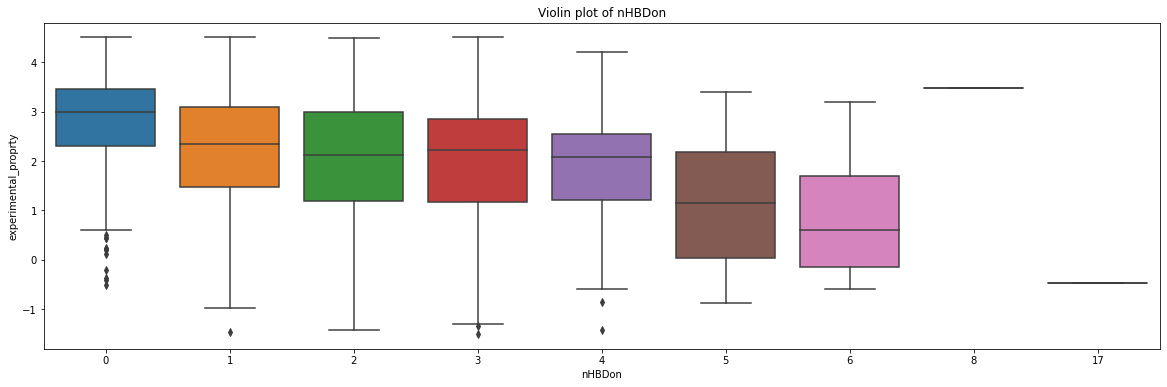

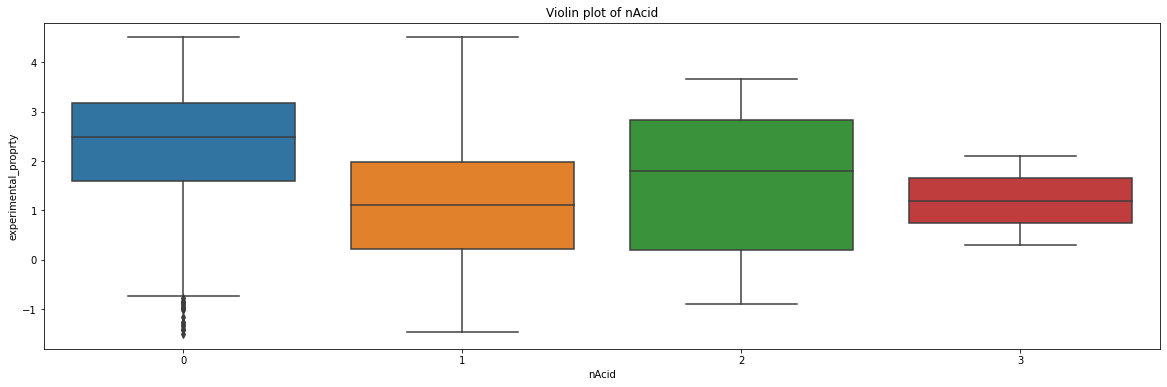

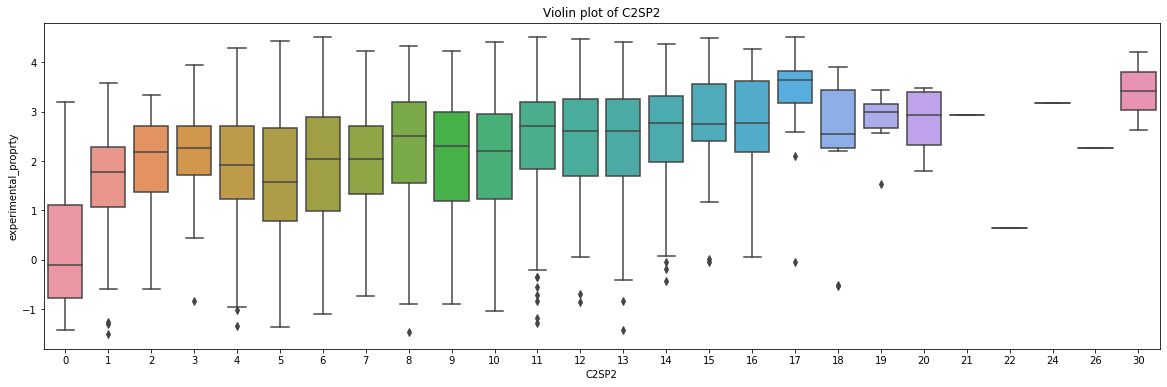

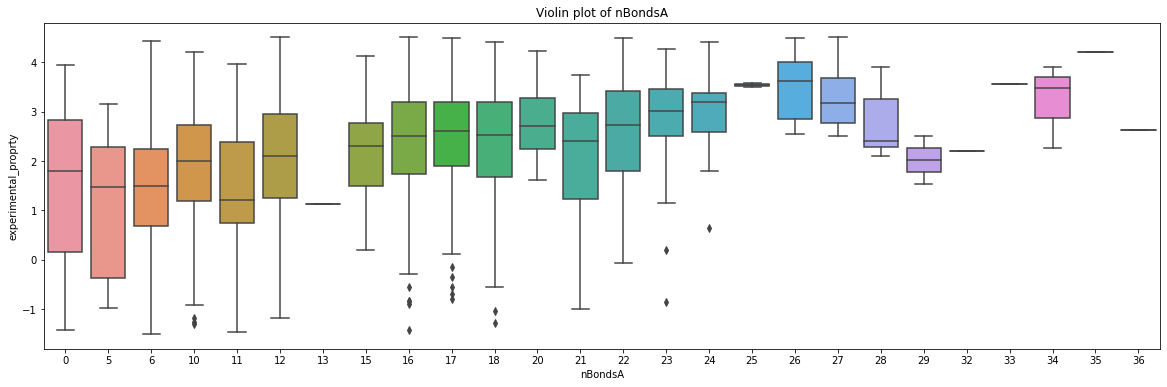

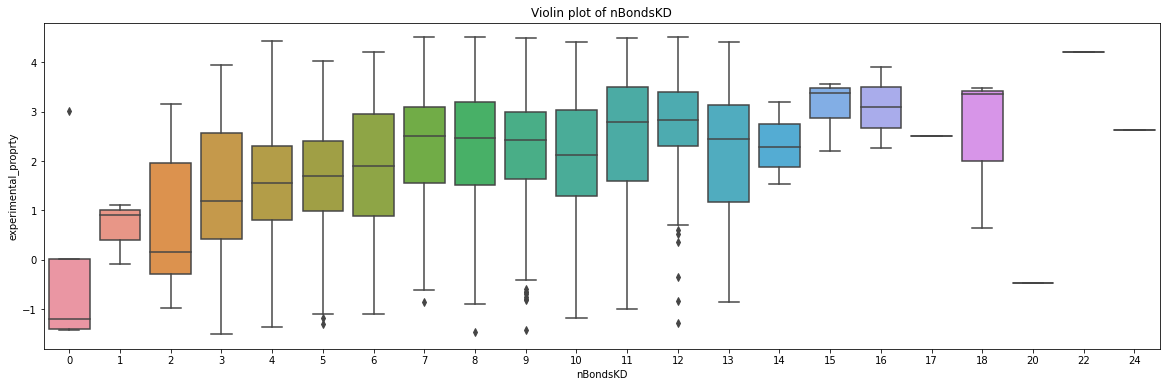

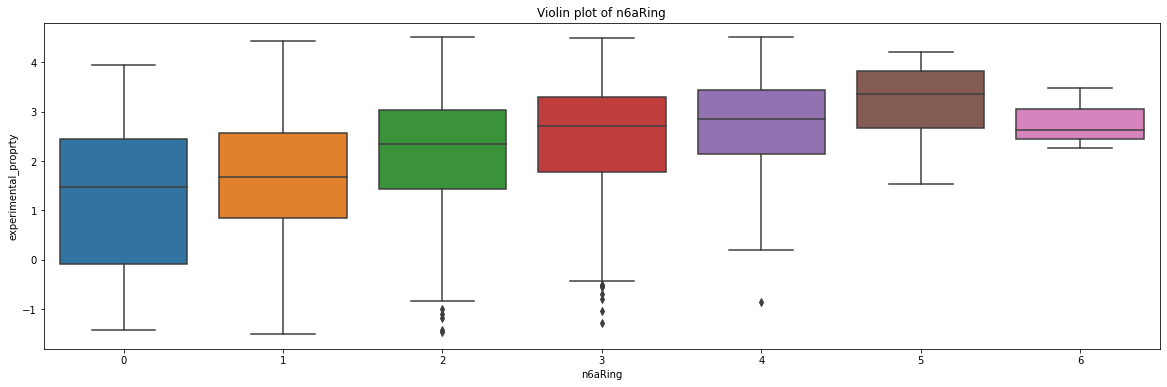

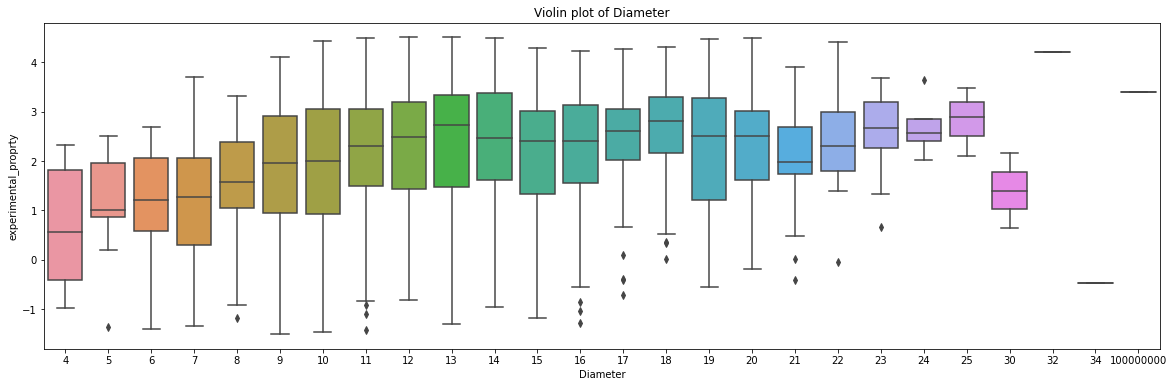

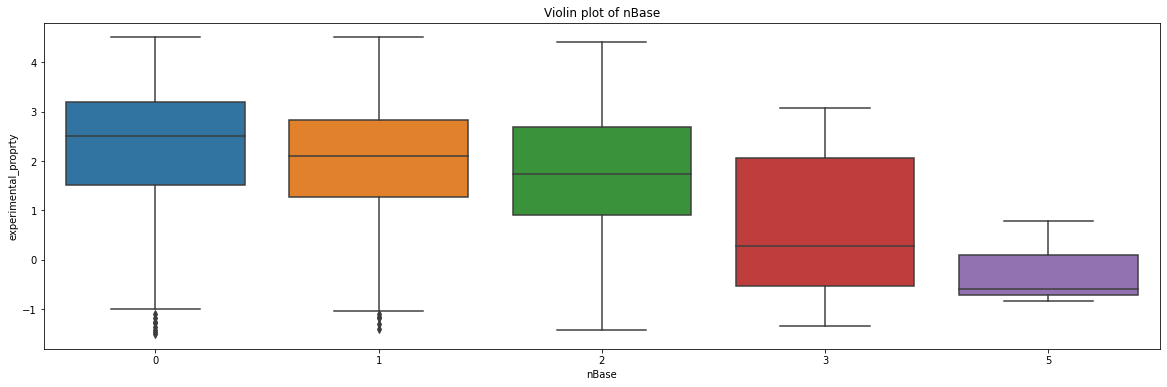

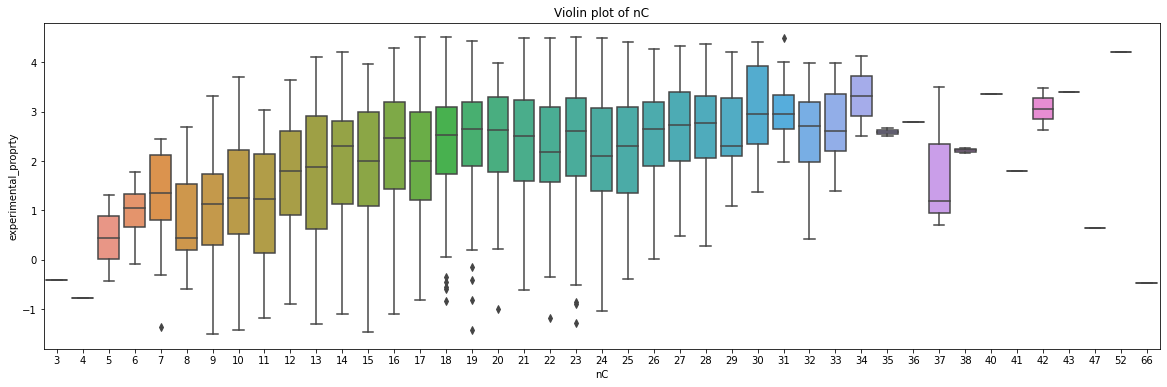

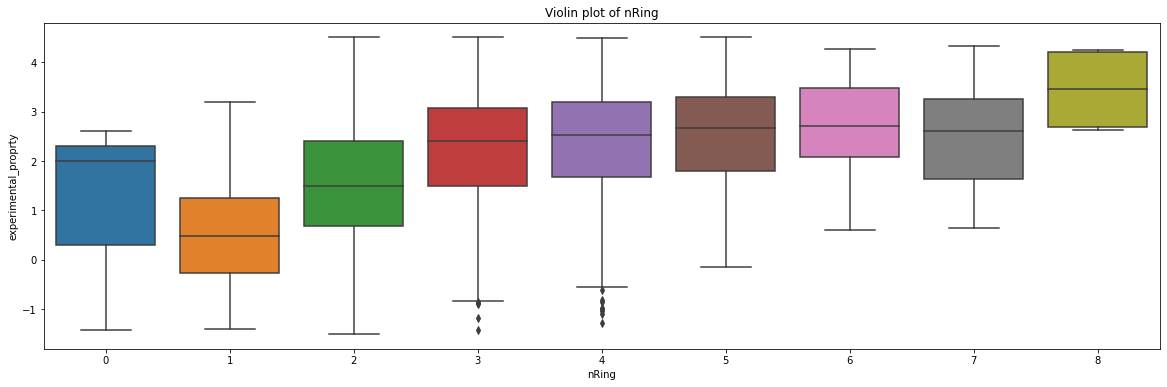

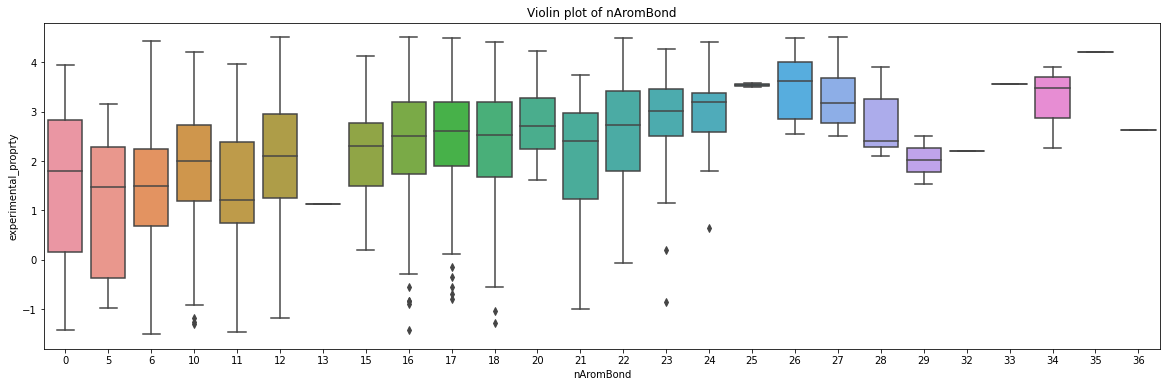

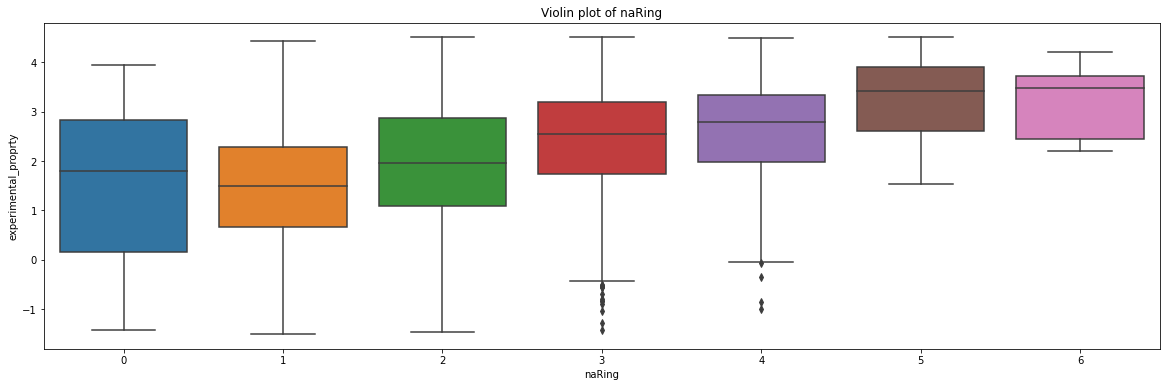

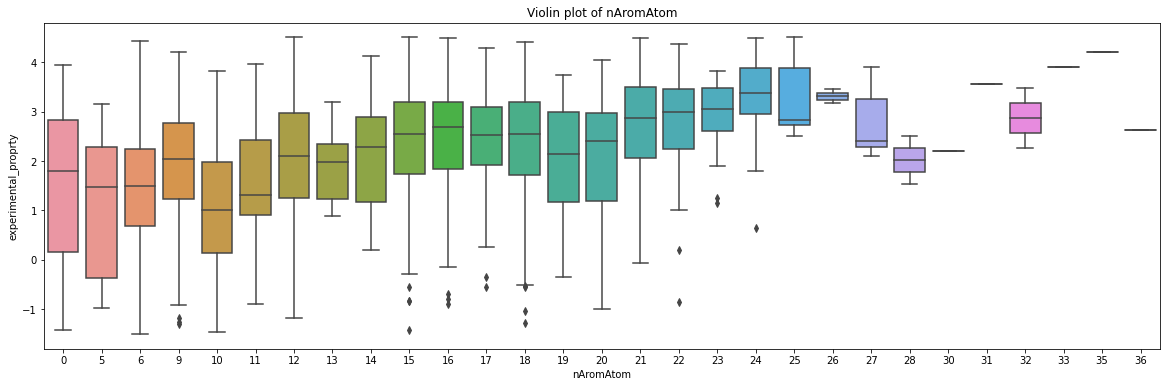

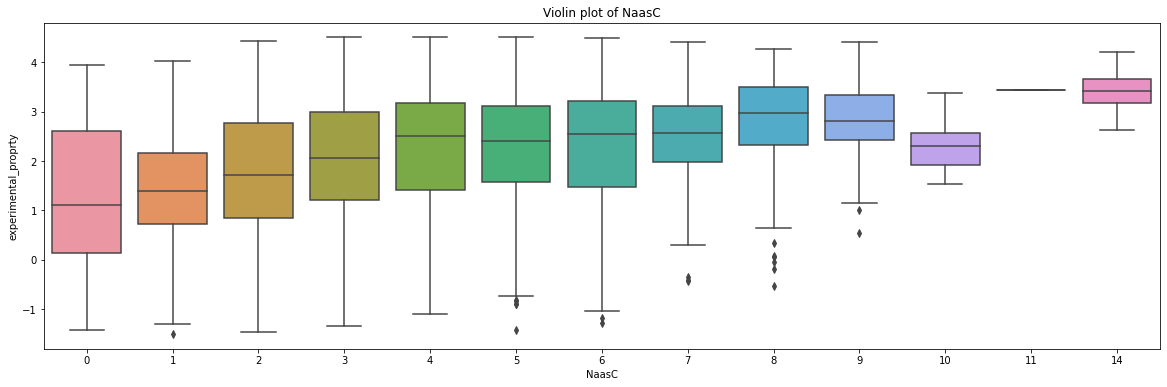

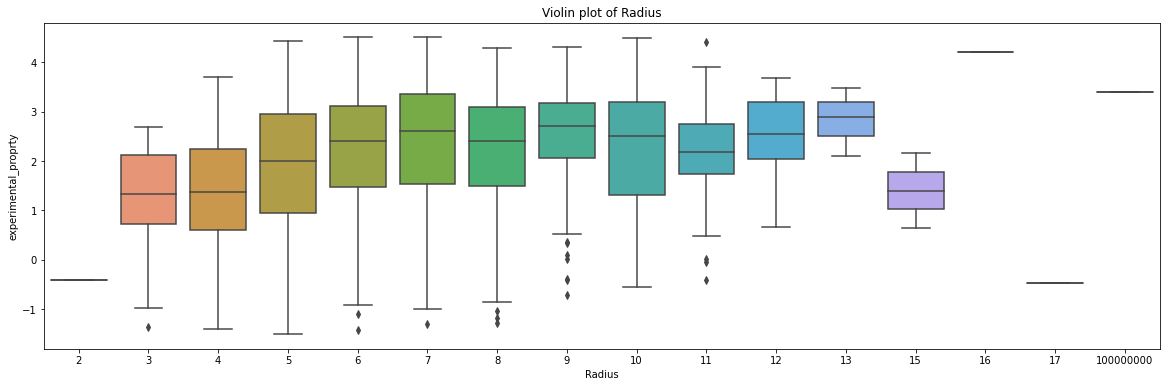

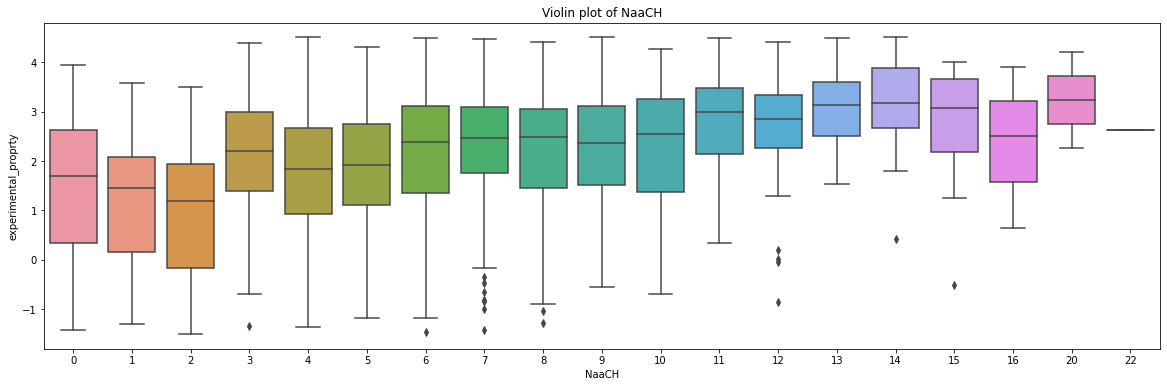

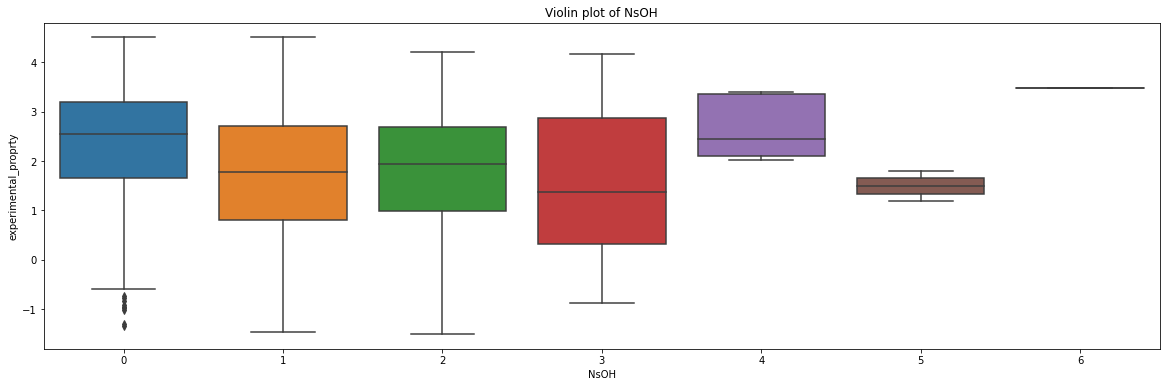

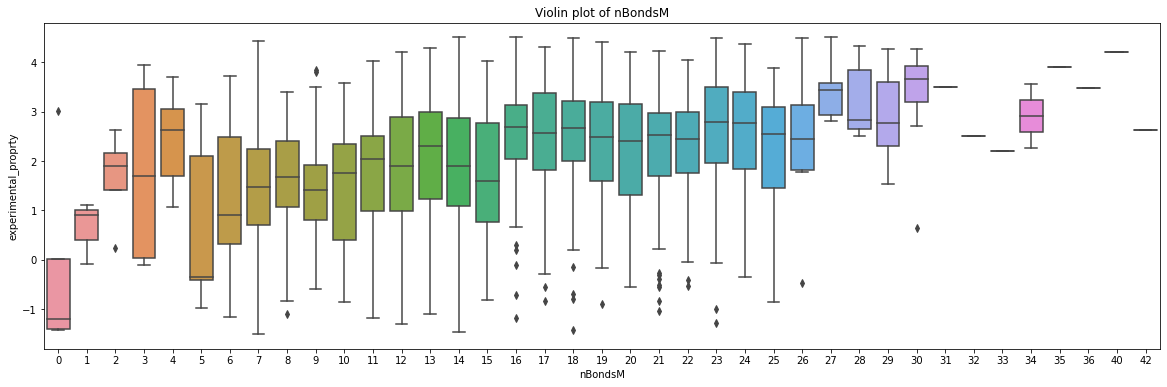

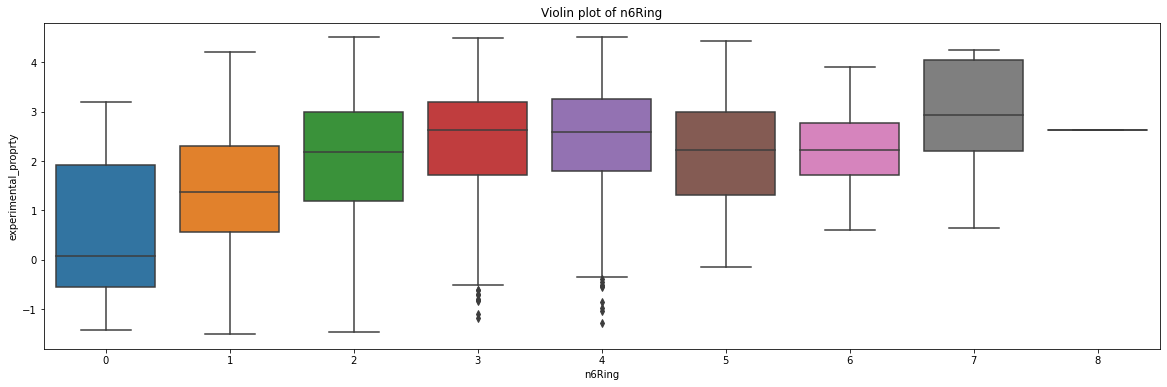

19


In [228]:
count=0
for col in significant_columns:
    plt.figure(figsize=(20, 6))
    sns.boxplot(x=col, y="experimental_proprty", data=df1)
    plt.title(f"Violin plot of {col}")
    plt.show()
    count= count+1
    
print(count)

### As we can see, the columns 'nHBDon','nAcid','nBase', and 'NsOH' hase negative relationship with the target column 'experimental_proprty'. 'nAcid', 'C2SP2', 'nBondsA', 'nBondsKD', 'n6aRing', 'Diameter','nC','nRing', 'nAromBond', 'naRing', 'nAromAtom', 'NaasC', 'Radius', 'NaaCH',  'nBondsM', and 'n6Ring' have positive relation with the target column.

## Compute the PCA:

In [229]:
object_columns = df1.select_dtypes(include=['object']).columns
print(object_columns)

Index(['MS_enc'], dtype='object')


In [230]:
df1.drop(columns=['MS_enc'], inplace=True)
print(df1.dtypes.value_counts())

float64    444
int64      104
dtype: int64


### I want to first take away the object type in the df1 so that there is only numerical value in the data frame. 

In [231]:
mean = df1.mean()
std = df1.std()
standardizedDf = (df1 - mean) / std
print(standardizedDf.std())

experimental_proprty    1.0
nHetero                 1.0
nX                      1.0
C2SP3                   1.0
MPC5                    1.0
                       ... 
AATSC1dv                1.0
nFARing                 1.0
AATS2v                  1.0
Xp-7dv                  1.0
n6Ring                  1.0
Length: 548, dtype: float64


In [232]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x = standardizedDf.drop('experimental_proprty', axis=1)
y = standardizedDf['experimental_proprty']

pca = PCA(0.95)
principalComponents = pca.fit_transform(x)
#pca.explained_variance_ratio_

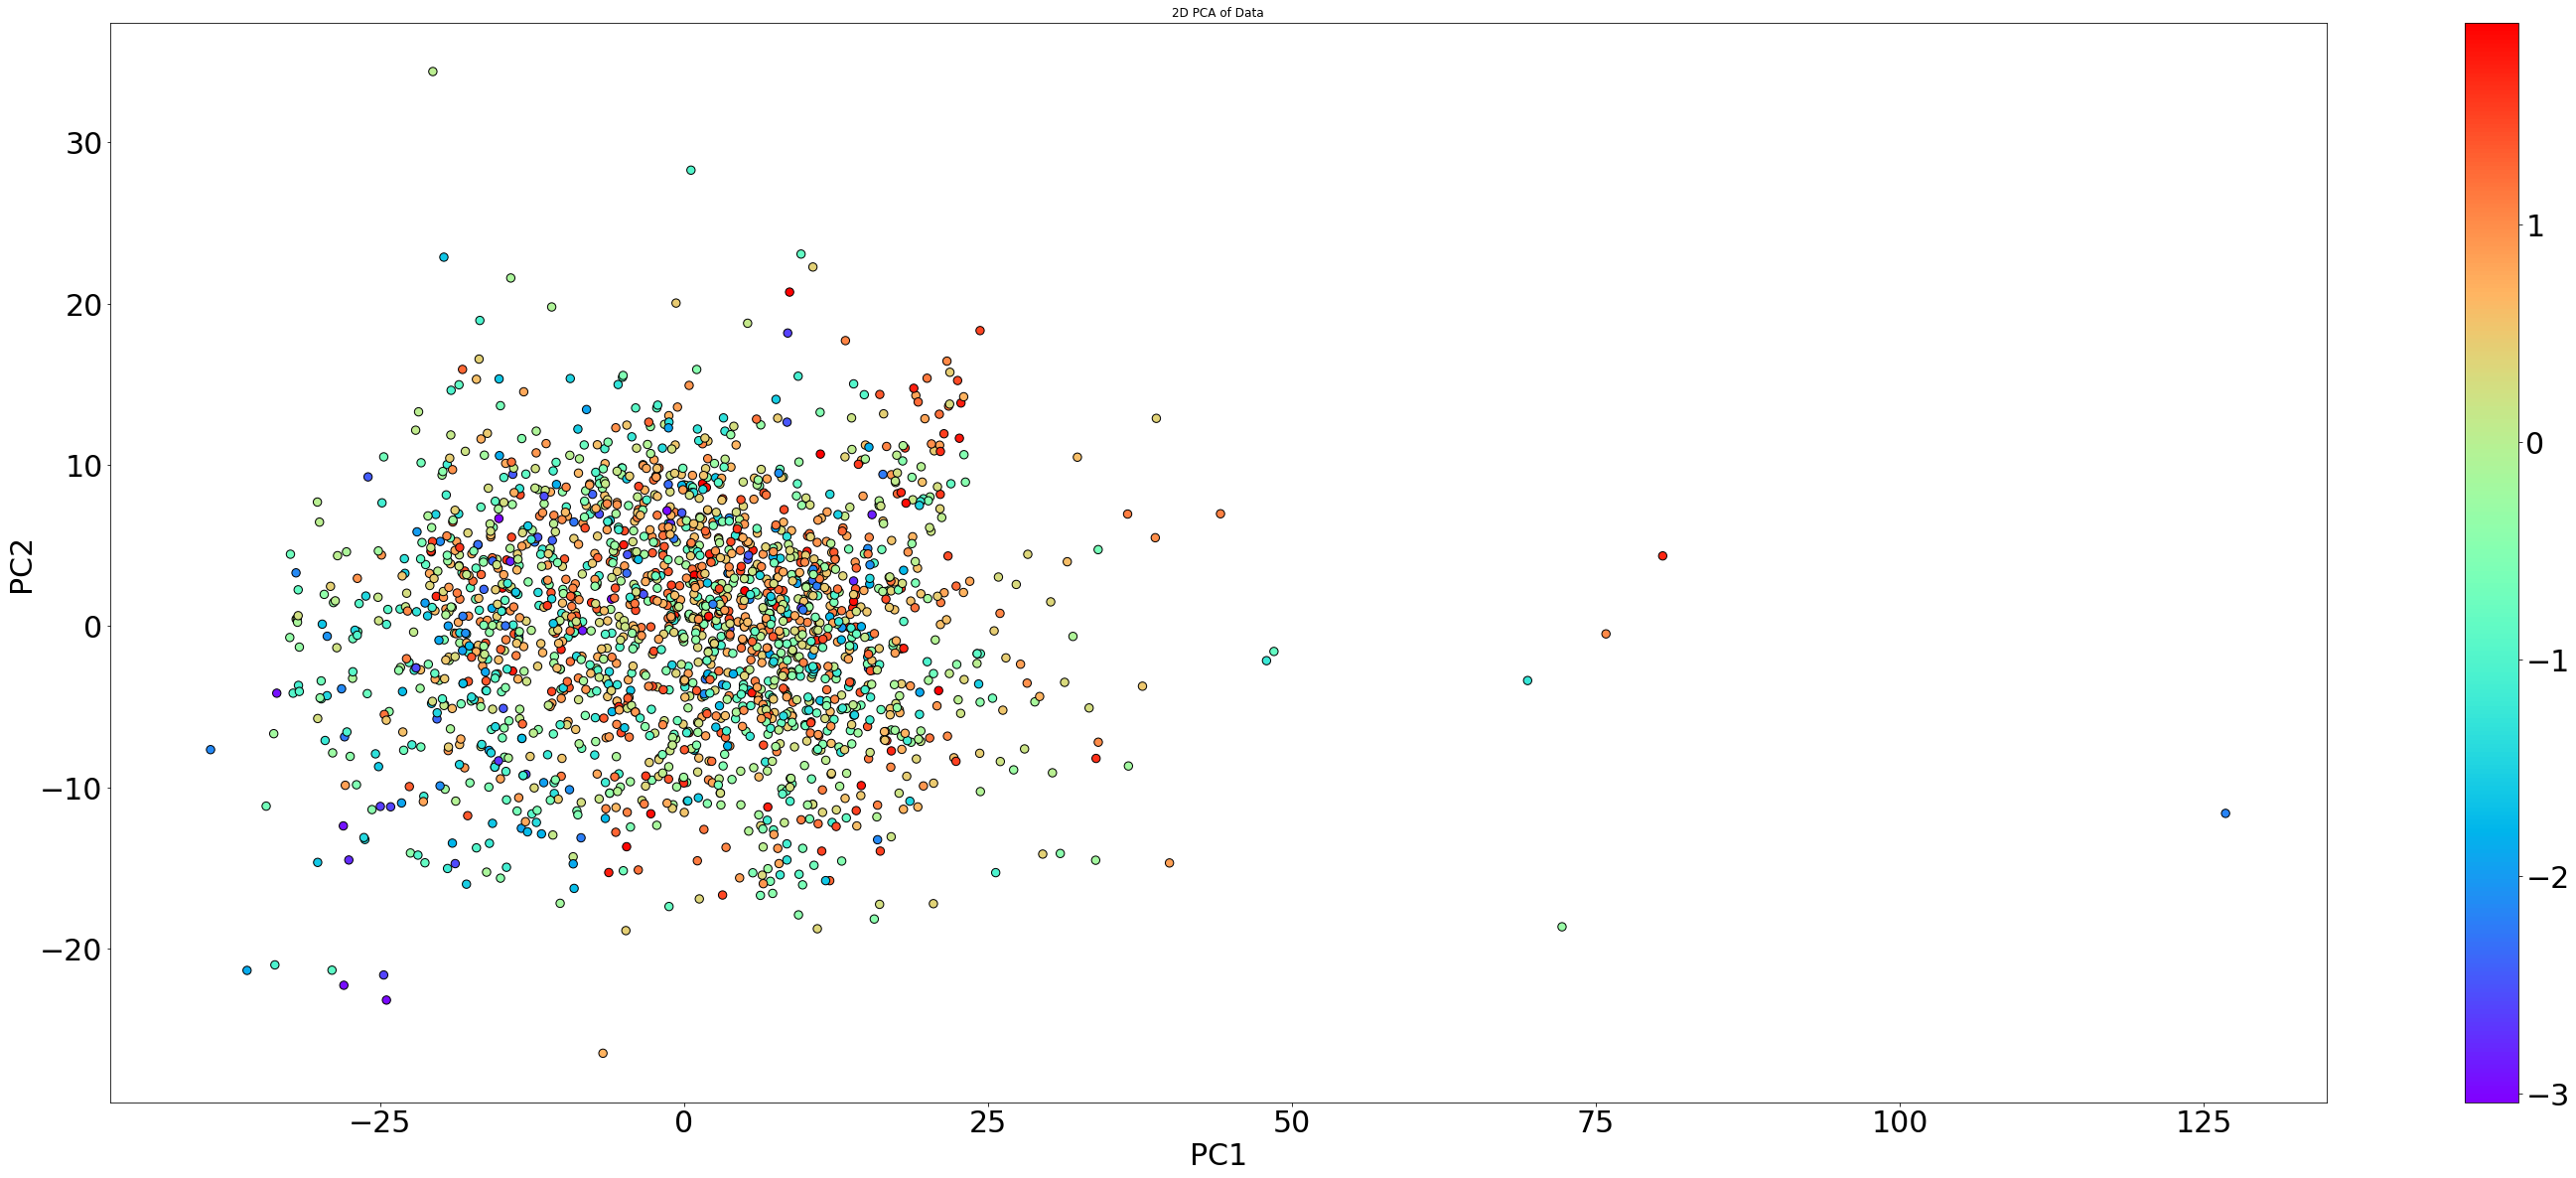

In [233]:
plt.figure(figsize=(50, 20))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=y, cmap='rainbow', edgecolor='k', s=70)
bar = plt.colorbar()
bar.ax.tick_params(labelsize=30)

plt.xlabel('PC1',fontsize=30)
plt.ylabel('PC2',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.title('2D PCA of Data')
plt.show()

### PCA Observation: Upon observing the PCA plot, I noticed a cluster of points forming a circle centered at (0,0). Interestingly, the red dots, which correspond to the higher values of our target variable, are closely grouped around (0,0). This suggests that these data points might share underlying features, making them more similar to each other. Conversely, data points with lower values of the target variable are dispersed primarily in the third quadrant, indicating that they capture more variability than the rest. Given that the majority of data points lie near zero on PC1 and only a few are positioned far from this center, the distant ones can be considered outliers.

### Remove outliers and Plot again:

In [234]:
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler

distances = distance.cdist(principalComponents, principalComponents, 'euclidean')
mean_distances = distances.mean(axis=1)
threshold = mean_distances.mean() + 2*mean_distances.std()
outliers_idx = np.where(mean_distances > threshold)[0]
df_cleaned = df1.drop(outliers_idx)

print(f"Original number of rows: {df1.shape[0]}")
print(f"Number of rows after removing outliers: {df_cleaned.shape[0]}")

Original number of rows: 2000
Number of rows after removing outliers: 1966


###  I utilized the Euclidean Distance method to detect and subsequently eliminate outliers. This method seemed appropriate because, upon initial observation of the original PCA plot, there was a clear central cluster, with a few data points significantly distanced from this core. These outliers were either shifted to the right, showing high values on PC1, or positioned far upward with high values on PC2. To address this, I measured the Euclidean distance between pairs of points in the space, anticipating that most data points would cluster around the average distance. If a point's distance exceeded the average by more than two standard deviations, I deemed it an outlier and chose to exclude it from the dataset.


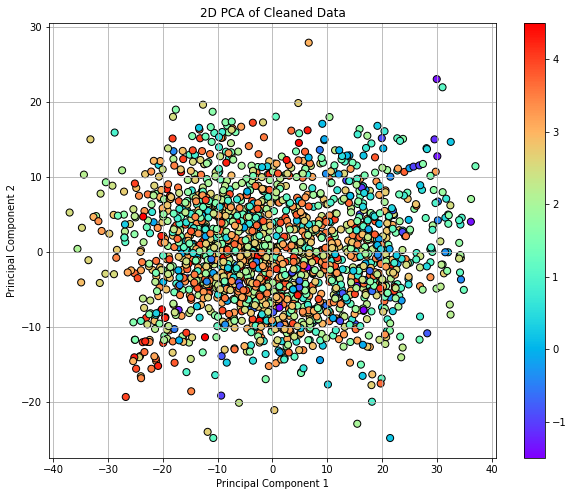

In [235]:
X_cleaned = df_cleaned.drop(columns=['experimental_proprty']) 
y_cleaned = df_cleaned['experimental_proprty']

scaler = StandardScaler()
X_scaled_cleaned = scaler.fit_transform(X_cleaned)

pca = PCA(n_components=2)
principalComponents_cleaned = pca.fit_transform(X_scaled_cleaned)

# Visualization of the df without outliers
plt.figure(figsize=(10,8))
sc = plt.scatter(principalComponents_cleaned[:, 0], principalComponents_cleaned[:, 1], c=y_cleaned, cmap='rainbow', edgecolor='k', s=50)
plt.colorbar(sc)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Cleaned Data')
plt.grid(True)
plt.show()

## Bonus Question: 

###  Non-linear dimensionality reduction method: t-SNE:

/Users/77wu/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


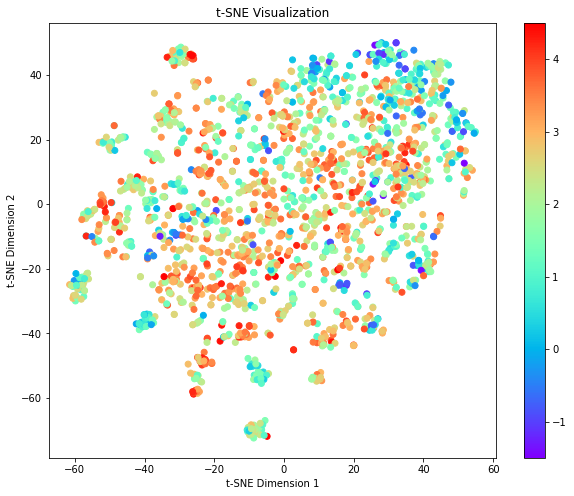

In [236]:
from sklearn.manifold import TSNE
data_scaled = StandardScaler().fit_transform(df1)

tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200, n_iter=1000)
tsne_results = tsne.fit_transform(data_scaled)
target_variable = df1['experimental_proprty'].values
plt.figure(figsize=(10,8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=target_variable, cmap='rainbow')  # color by target variable
plt.colorbar()
plt.title("t-SNE Visualization")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

### I chose to use t-SNE for the non-linear dimensionality reduction technique. Upon plotting, the results were distinctively different from the PCA plot before outlier removal. Notably, the t-SNE visualization lacked obvious outliers. In contrast to PCA, where some data points lay far from the majority and were considered outliers, the t-SNE plot suggested these points might not exist on the same linear plane in lower-dimensional space. Instead, they could be interconnected in a more complex, high-dimensional space. Additionally, the presence of multiple smaller clusters in the t-SNE plot hints at certain data rows being more similar to each other in this high-dimensional context.

# Write Up: 

## Analyze types of data & Process erroneous feature:
#### While analyzing the data types in my dataset, I utilized the .info() function. This function is particularly useful as it not only displays the existing data types of the dataset but also indicates the number of columns corresponding to each type. Upon recognizing that three columns were of object type, I inspected these columns more closely.
#### Curiosity arose regarding the nature of these object-type columns – were they categorical variables? To answer this, I examined their unique values. To my surprise, the 'MIF' column, which ideally should have been numerical, was classified as an object type due to the presence of the erroneous value 'Computation failed' in some rows. To rectify this, I replaced 'Computation failed' with -99, ensuring this value stood out, and subsequently converted the entire column to the int type, making it suitable for numerical computations.
#### Another column labeled 'SMIF' was distinctly categorical, evident from its three unique values: 'big', 'bigger', and 'biggest'. To align its data type with the majority of the columns and to ensure it's compatible for future visualizations, I mapped these three unique values to 1, 2, and 3 respectively, converting the entire column to int type.

## Find and process missing features:
#### To identify missing values in the dataset, I initially utilized the .isnull().any() function to check for columns containing at least one NaN value. The results indicated that only the 'MW2' column possessed missing values. In determining an appropriate strategy for managing these missing values, I first assessed the proportion of missing values in relation to the entire column and then reviewed the column's statistical properties.
#### While only 5% of the rows in the 'MW2' column had missing values, I opted to retain them. Given the extensive nature of the dataset, encompassing 552 columns, I was wary of row deletions potentially erasing crucial information. A closer examination of the 'MW2' column's statistics revealed a rightward skew. In such cases, the median often serves as a superior measure of central tendency because it remains relatively unaffected by extreme values. Consequently, I chose to substitute the missing values with the median, ensuring that subsequent z-score calculations wouldn't be significantly impacted.

## Find Outliers:
#### I decided to employ the z-score method to identify outliers, as it quantifies the distance of a specific data point from the mean of a dataset, where a considerable distance may indicate an abnormality. Before applying the z-score to continuous variables, I need to figure out which columns held categorical data. This is to avoid computing z-scores for such columns, since z-scores for categorical data are non-informative. Given that my dataset contains 2000 rows, any column with unique data comprising less than 2.5% of this total was classified as holding categorical data. Additionally, I discarded columns with just a single unique value, as they lack variance and don't contribute analytical value.
#### For a particular column with erroneous data, I replaced the anomalies with the column's median, especially since the data was right-skewed. Subsequently, I marked categorical columns within the dataframe to ensure they were bypassed during z-score computation. In the course of determining z-scores, I designed a 2D array to log the presence of outliers: a '1' indicated an outlier, while a '0' represented its absence. Utilizing this array, I experimented with omitting rows from the original dataframe that had at least one outlier across any column. The result was a significant data reduction, leaving only 757 of the original 2000 rows. Given the drastic cut, there was a substantial risk of losing vital information. Hence, I decided to retain the data for the time being, postponing outlier removal until further analysis.

## Find highly correlated variables:
#### I employed the .corr() function to assess the correlation among columns. If the absolute value of the correlation coefficient between two columns exceeds 0.8, it indicates a high correlation. I've recorded these as "highly correlated pairs." To delve deeper into the relationships between these pairs, I utilized a network graph. This revealed that several of these columns are interconnected, suggesting the presence of sets of features that exhibit mutual correlation.

## Find if the target variable is correlated with any features
#### When exploring the correlation between the target variable and other features, I employed a method similar to the one I used previously. I found that no columns exhibited a strong correlation with the target variable. However, to determine if any categorical features correlated with the target variable, I utilized the ANOVA test. This test ascertains whether there are statistically significant differences in the means of the continuous target variable across the categories of a nominal variable. Fortunately, I identified several columns that met my criteria for having a strong correlation with the target variable. I then further visualized these relationships using boxplots, which clearly highlighted the correlations.